In [1]:
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import cell2location
import scvi

from matplotlib import rcParams
from cell2location.utils.filtering import filter_genes
from cell2location.models import RegressionModel

Global seed set to 0
/home/mengwei/miniconda3/envs/celltolocation/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/mengwei/miniconda3/envs/celltolocation/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
import os
os.chdir("/scbio7/mengwei/notebook")

In [3]:
adata_vis = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
adata_vis.obs['sample'] = list(adata_vis.uns['spatial'].keys())[0]
adata_ref = sc.read(
    filename="tonsil.h5ad",
    backup_url='https://www.immunesinglecell.org/api/vishuo/download/getAtlasRDS?atlas=tonsil&type=h5ad'
)

  0%|          | 0.00/7.86M [00:00<?, ?B/s]

  0%|          | 0.00/29.3M [00:00<?, ?B/s]

/home/mengwei/miniconda3/envs/celltolocation/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/home/mengwei/miniconda3/envs/celltolocation/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


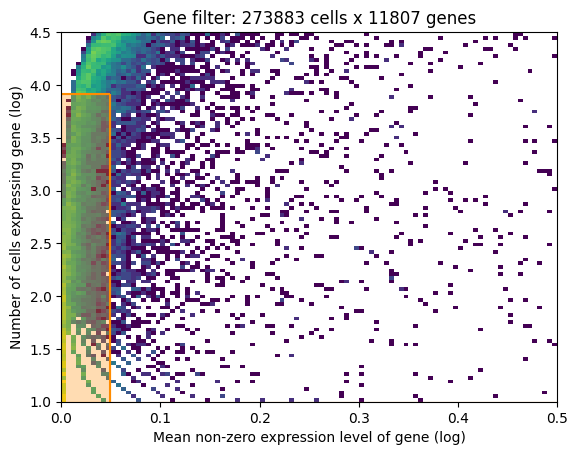

In [4]:
selected = filter_genes(adata_ref, cell_count_cutoff=5, cell_percentage_cutoff2=0.03, nonz_mean_cutoff=1.12)
adata_ref = adata_ref[:, selected].copy()
adata_ref.raw = adata_ref

In [5]:
sc.pp.subsample(adata_ref, n_obs = 10000)
cell2location.models.RegressionModel.setup_anndata(adata= adata_ref,
                        batch_key='sampleId',
                        labels_key='ct')
mod = RegressionModel(adata_ref)
mod.view_anndata_setup()

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Anndata setup with scvi-tools version 0.19.0.

Setup via `RegressionModel.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'sampleId',
│   'labels_key': 'ct',
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │  53   │
│         n_cells          │ 10000 │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │  39   │
│          n_vars          │ 11807 │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                        batch State Registry                         
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃     Categories      ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['sampleId'] │ BCLL_10_T_1_hashing │          0          │
│                       │ BCLL_10_T_2_hashing │          1          │
│                       │    BCLL_10_T_5K     │          2          │
│                       │ BCLL_11_T_1_hashing │          3          │
│                       │ BCLL_11_T_2_hashing │          4          │
│                       │    BCLL_11_T_5K     │          5          │
│                       │ BCLL_12_T_1_hashing │          6          │
│                       │ BCLL_12_T_2_hashing │          7          │
│                       │    BCLL_12_T_5K     │          8          │
│                       │ BCLL_13_T_1_hashing │          9          │
│                       │ BCLL_13_T_2_hashing │         10          │
│                       │    BCLL_13_T_5K     │         11          │
│                       │ BCLL_14_T_1_hashing │         12          │
│                       │ BCLL_14_T_2_hashing │         13          │
│                       │    BCLL_14_T_5K     │         14          │
│                       │ BCLL_15_T_1_hashing │         15          │
│                       │ BCLL_15_T_2_hashing │         16          │
│                       │     BCLL_2_T_5K     │         17          │
│                       │  BCLL_2_T_hashing   │         18          │
│                       │ BCLL_6_T_1_hashing  │         19          │
│                       │ BCLL_6_T_2_hashing  │         20          │
│                       │ BCLL_8_T_1_hashing  │         21          │
│                       │ BCLL_8_T_2_hashing  │         22          │
│                       │     BCLL_8_T_5K     │         23          │
│                       │ BCLL_9_T_1_hashing  │         24          │
│                       │ BCLL_9_T_2_hashing  │         25          │
│                       │     BCLL_9_T_5K     │         26          │
│                       │     GSM3162630      │         27          │
│                       │     GSM3375767      │         28          │
│                       │     GSM3375768      │         29          │
│                       │     GSM3375769      │         30          │
│                       │     GSM3375770      │         31          │
│                       │     GSM4138168      │         32          │
│                       │     GSM4138169      │         33          │
│                       │     GSM4138170      │         34          │
│                       │     GSM4138171      │         35          │
│                       │     GSM4138172      │         36          │
│                       │     GSM4148370      │         37          │
│                       │     GSM4148371      │         38          │
│                       │     GSM4148372      │         39          │
│                       │     GSM4148373      │         40          │
│                       │     GSM4148374      │         41          │
│                       │     GSM4148375      │         42          │
│                       │     GSM4560814      │         43          │
│                       │     GSM4560815      │         44          │
│                       │     GSM4837488      │         45          │
│                       │     GSM4837489      │         46          │
│                       │     GSM5051493      │         47          │
│                       │     GSM5051494      │         48          │
│                       │     GSM5051495      │         49          │
│                       │     GSM5051496      │         50          │
│                       │     GSM5051497      │         51          │
│                       │     GSM5051498      │         52          │
└─────────

                               labels State Registry                                
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Source Location ┃                Categories                ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['ct'] │          Class switch memory B           │          0          │
│                 │                 DZ/LZ B                  │          1          │
│                 │         Dark zone follicular DC          │          2          │
│                 │            Double negative T             │          3          │
│                 │             Epithelial cell              │          4          │
│                 │              FCRL4 memory B              │          5          │
│                 │                 G2M DZ B                 │          6          │
│                 │            GC committed cell             │          7          │
│                 │               Granulocyte                │          8          │
│                 │        Histone high S phase DZ B         │          9          │
│                 │          INF responsed naive B           │         10          │
│                 │            ITGAX+ macrophage             │         11          │
│                 │                   LZ B                   │         12          │
│                 │         Light zone follicular DC         │         13          │
│                 │ MHC class II high monocyte/DC/macrophage │         14          │
│                 │                Macrophage                │         15          │
│                 │            Memory B precursor            │         16          │
│                 │               Memory CD4 T               │         17          │
│                 │               Memory CD8 T               │         18          │
│                 │                 NK cell                  │         19          │
│                 │                 Naive B                  │         20          │
│                 │               Naive CD4 T                │         21          │
│                 │               Naive CD8 T                │         22          │
│                 │        Non-class switch memory B         │         23          │
│                 │          Nonproliferative GC B           │         24          │
│                 │              PIF1+ G2M DZ B              │         25          │
│                 │               Plasma cell                │         26          │
│                 │          Plasma cell precursor           │         27          │
│                 │                Pre-B cell                │         28          │
│                 │                 Pre-GC B                 │         29          │
│                 │             Proliferation T              │         30          │
│                 │          Proliferation unknown           │         31          │
│                 │               S phase DZ B               │         32          │
│                 │                   Tfh                    │         33          │
│                 │             Tonsillar crypt              │         34          │
│                 │                   Treg                   │         35          │
│                 │                   cDC2                   │         36          │
│                 │                  mregDC                  │         37          │
│                 │                   pDC                    │         38          │
└─────────────────┴──────────────────────────────────────────┴─────────────────────┘

In [6]:
mod.train(max_epochs=250, use_gpu=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/mengwei/miniconda3/envs/celltolocation/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:105: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/home/mengwei/miniconda3/envs/celltolocation/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (4) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 250/250: 100%|██████████| 250/250 [05:26<00:00,  1.42s/it, v_num=1, elbo_train=5.29e+7]

`Trainer.fit` stopped: `max_epochs=250` reached.


Epoch 250/250: 100%|██████████| 250/250 [05:26<00:00,  1.31s/it, v_num=1, elbo_train=5.29e+7]


In [7]:
adata_ref = mod.export_posterior(
    adata_ref, sample_kwargs={'num_samples': 1000, 'batch_size': 2500, 'use_gpu': True}
)
if 'means_per_cluster_mu_fg' in adata_ref.varm.keys():
    inf_aver = adata_ref.varm['means_per_cluster_mu_fg'][[f'means_per_cluster_mu_fg_{i}'
                                    for i in adata_ref.uns['mod']['factor_names']]].copy()
else:
    inf_aver = adata_ref.var[[f'means_per_cluster_mu_fg_{i}'
                                    for i in adata_ref.uns['mod']['factor_names']]].copy()
inf_aver.columns = adata_ref.uns['mod']['factor_names']
inf_aver.iloc[0:5, 0:5]
adata_vis.var_names_make_unique()

Sampling global variables, sample: 100%|██████████| 999/999 [00:12<00:00, 79.61it/s]


In [8]:
# find shared genes and subset both anndata and reference signatures
intersect = np.intersect1d(adata_vis.var_names, inf_aver.index)
adata_vis = adata_vis[:, intersect].copy()
inf_aver = inf_aver.loc[intersect, :].copy()

# prepare anndata for cell2location model
cell2location.models.Cell2location.setup_anndata(adata=adata_vis, batch_key="sample")
mod = cell2location.models.Cell2location(
    adata_vis, cell_state_df=inf_aver,
    # the expected average cell abundance: tissue-dependent
    # hyper-prior which can be estimated from paired histology:
    N_cells_per_location=30,
    # hyperparameter controlling normalisation of
    # within-experiment variation in RNA detection:
    detection_alpha=20
)
mod.view_anndata_setup()

Anndata setup with scvi-tools version 0.19.0.

Setup via `Cell2location.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'sample',
│   'labels_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   1   │
│         n_cells          │ 4035  │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   1   │
│          n_vars          │ 11711 │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                       batch State Registry                        
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃     Categories      ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['sample'] │ V1_Human_Lymph_Node │          0          │
└─────────────────────┴─────────────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

In [ ]:
mod.train(max_epochs=30000,
          # train using full data (batch_size=None)
          batch_size=None,
          # use all data points in training because
          # we need to estimate cell abundance at all locations
          train_size=1,
          use_gpu=True)

 mod.plot_history(1000)
plt.legend(labels=['full data training']);

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/mengwei/miniconda3/envs/celltolocation/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:105: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/home/mengwei/miniconda3/envs/celltolocation/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 29265/30000:  98%|█████████▊| 29264/30000 [47:36<01:06, 11.09it/s, v_num=1, elbo_train=4.84e+7]  

In [11]:
adata_vis = mod.export_posterior(
    adata_vis, sample_kwargs={'num_samples': 1000, 'batch_size': mod.adata.n_obs, 'use_gpu': True}
)

Sampling global variables, sample: 100%|██████████| 999/999 [00:18<00:00, 52.70it/s]


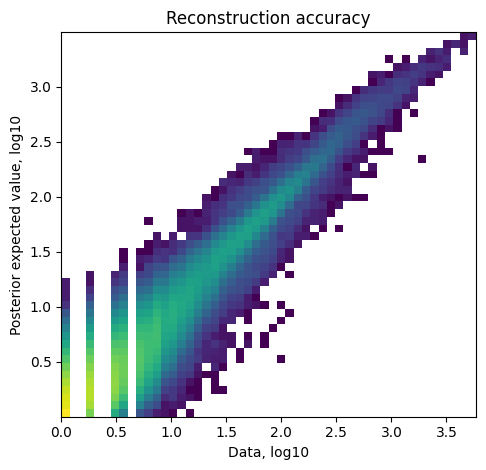

In [12]:
mod.plot_QC()

In [13]:
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']

In [14]:
from cell2location.utils import select_slide
slide = select_slide(adata_vis, 'V1_Human_Lymph_Node')

In [17]:
slide

AnnData object with n_obs × n_vars = 4035 × 11711
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', '_indices', '_scvi_batch', '_scvi_labels', 'Class switch memory B', 'DZ/LZ B', 'Dark zone follicular DC', 'Double negative T', 'Epithelial cell', 'FCRL4 memory B', 'G2M DZ B', 'GC committed cell', 'Granulocyte', 'Histone high S phase DZ B', 'INF responsed naive B', 'ITGAX+ macrophage', 'LZ B', 'Light zone follicular DC', 'MHC class II high monocyte/DC/macrophage', 'Macrophage', 'Memory B precursor', 'Memory CD4 T', 'Memory CD8 T', 'NK cell', 'Naive B', 'Naive CD4 T', 'Naive CD8 T', 'Non-class switch memory B', 'Nonproliferative GC B', 'PIF1+ G2M DZ B', 'Plasma cell', 'Plasma cell precursor', 'Pre-B cell', 'Pre-GC B', 'Proliferation T', 'Proliferation unknown', 'S phase DZ B', 'Tfh', 'Tonsillar crypt', 'Treg', 'cDC2', 'mregDC', 'pDC'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', '_scvi_uuid', '_scvi_manager_uuid', 'mod'
    obsm: 'spatial', 'means_cell_abundan

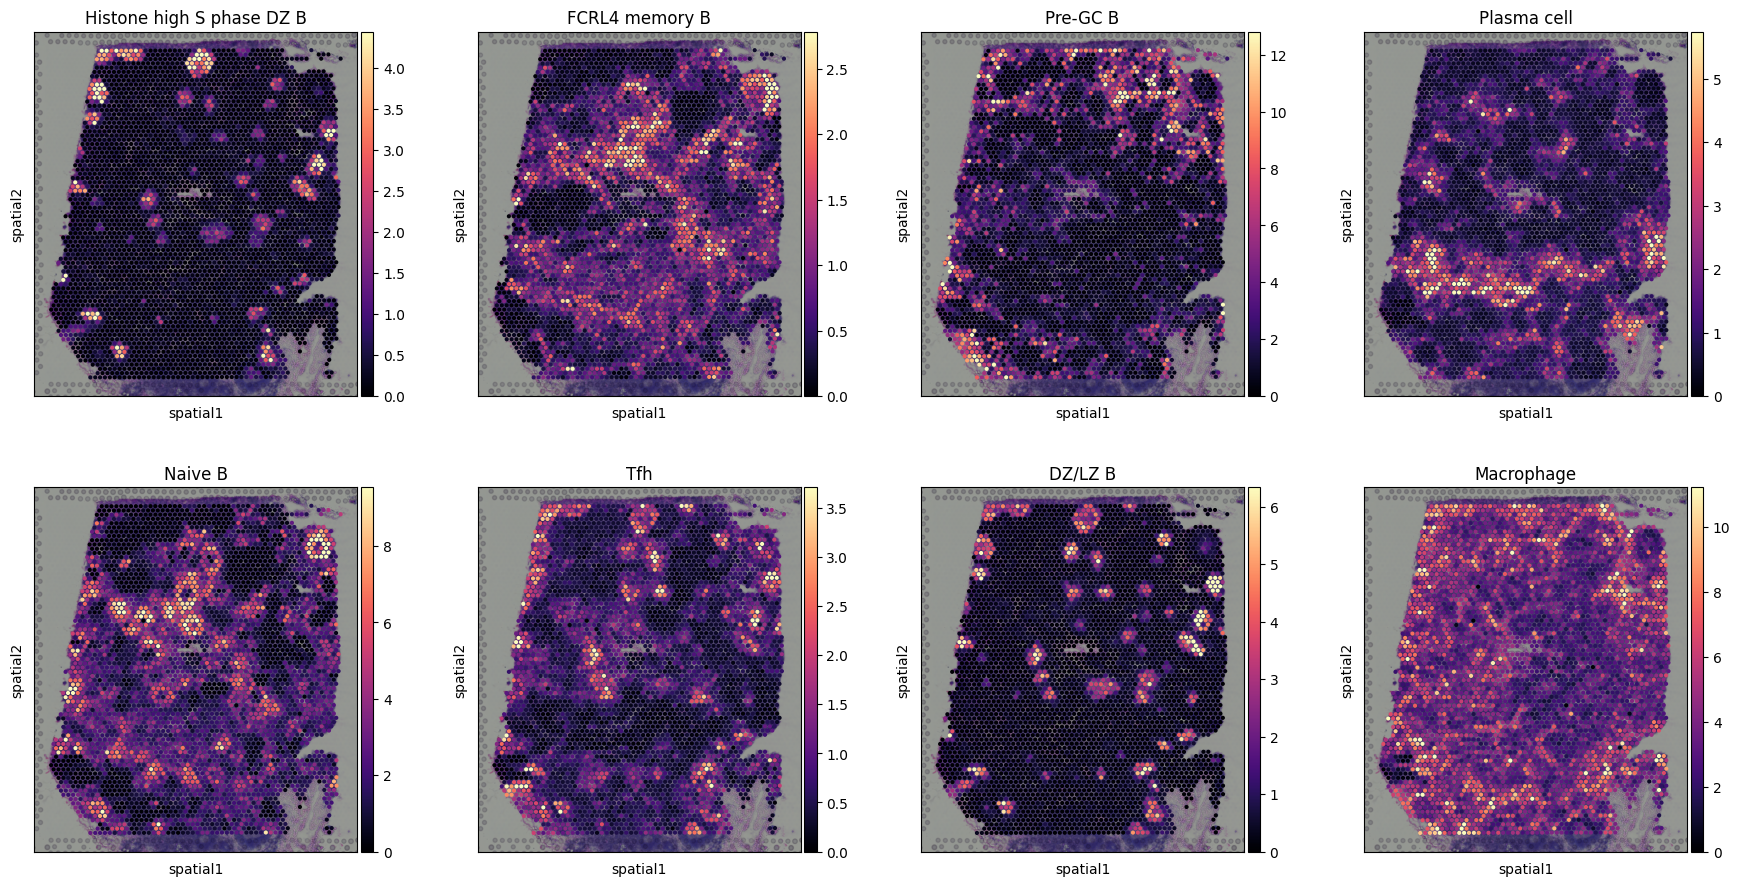

In [27]:
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):

    sc.pl.spatial(slide, cmap='magma',
                  # show first 8 cell types
                  color=['Histone high S phase DZ B', 'FCRL4 memory B', 'Pre-GC B', 'Plasma cell', 'Naive B','Tfh', 'DZ/LZ B', 'Macrophage'],
                  ncols=4, size=1.3,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.2'
                 )